In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# data files
SalaryDataFile = "Salaries.csv"

# Read the data file
SalaryData = pd.read_csv(SalaryDataFile)
SalaryData.head()



,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [9]:
#read in csv files
salary_df = pd.read_csv(SalaryDataFile)

#filter salary df 
filtered_salary_df = salary_df.loc[salary_df['yearID'] > 1999]
filtered_salary_df


,yearID,teamID,lgID,playerID,salary
12263,2000,ANA,AL,anderga01,3250000
12264,2000,ANA,AL,belchti01,4600000
12265,2000,ANA,AL,botteke01,4000000
12266,2000,ANA,AL,clemeed02,215000
12267,2000,ANA,AL,colanmi01,200000
...,...,...,...,...,...
25570,2015,WAS,NL,treinbl01,512800
25571,2015,WAS,NL,ugglada01,507500
25572,2015,WAS,NL,werthja01,21000000
25573,2015,WAS,NL,zimmejo02,16500000


In [10]:
#read in csv files
salary_df = pd.read_csv(SalaryDataFile)
pd.options.display.float_format = '{:,}'.format
filtered_salary_df.describe()


,yearID,salary
count,"13,312.0","13,312.0"
mean,"2,007.45703125","3,032,290.930138221"
std,4.605016502367647,"4,157,634.461273782"
min,"2,000.0","165,574.0"
25%,"2,003.0","421,975.0"
50%,"2,007.0","1,000,000.0"
75%,"2,011.0","4,000,000.0"
max,"2,015.0","33,000,000.0"


In [11]:
#sum salaries by year and team
sumOfSalaries = filtered_salary_df.groupby(by=['yearID','teamID'])['salary'].sum()
    
#create DataFrame from grouped data 
df = pd.DataFrame(sumOfSalaries, columns = ['yearID', 'teamID', 'salary'])
df


yearID teamID     salary
yearID teamID                         
2000   ANA       NaN    NaN   51464167
       ARI       NaN    NaN   81027833
       ATL       NaN    NaN   84537836
       BAL       NaN    NaN   81447435
       BOS       NaN    NaN   77940333
...              ...    ...        ...
2015   SLN       NaN    NaN  119241500
       TBA       NaN    NaN   64521233
       TEX       NaN    NaN  143742789
       TOR       NaN    NaN  112992400
       WAS       NaN    NaN  155587472

[480 rows x 3 columns]

In [12]:
# create a new dataset with the total salary
df=filtered_salary_df[['yearID','teamID','lgID','salary']].groupby(['yearID','teamID','lgID']).sum().reset_index()
df.head()


,yearID,teamID,lgID,salary
0,2000,ANA,AL,51464167
1,2000,ARI,NL,81027833
2,2000,ATL,NL,84537836
3,2000,BAL,AL,81447435
4,2000,BOS,AL,77940333


In [13]:
# Calculate how many standard deviations each team's Salary spending is away from the league average for that year
# Begin with calculation for one team for one year

# Calculate the mean salary for 2000
avg_salary = round(df[(df['yearID']==2000)]['salary'].mean(),2)
print(f'Average team salary in 2000 was ${avg_salary}')

Average team salary in 2000 was $55537836.73


In [14]:
# Calculate standard deviation for salaries in 2000
salary_dev = round(df[(df['yearID']== 2000)]['salary'].std(),2)
print(f'Salary standard deviation in 2000 was ${salary_dev}')

Salary standard deviation in 2000 was $21416220.28


In [15]:
# how many standard deviations from the mean is Boston's record?
std_devs_from_mean = (df.iloc[4,:]['salary'] -avg_salary )/salary_dev
print(f"Boston's total Salary in 2000 was ${df.iloc[4,:]['salary']}, which is {round(std_devs_from_mean,2)} standard deviations away from the League average in that year")
print('Bostons salary total was above the League average')

Boston's total Salary in 2000 was $77940333, which is 1.05 standard deviations away from the League average in that year
Bostons salary total was above the League average


In [16]:
# Calculate how many standard deviations a teams salary is from the mean for a given year and returns that value
def calculate_std_salary(df,year,salary):
    #print(year)
    #return ((df[(df['yearID']==year)]['salary'].mean())-salary)/(df[(df['yearID']==year)]['salary'].std()) 
    return (salary-(df[(df['yearID']==year)]['salary'].mean()))/(df[(df['yearID']==year)]['salary'].std())

In [17]:
df['StandardizedSalary'] = df.apply(lambda row: calculate_std_salary(df, row.yearID, row.salary), axis=1 )
df.head()

,yearID,teamID,lgID,salary,StandardizedSalary
0,2000,ANA,AL,51464167,-0.1902142245932114
1,2000,ARI,NL,81027833,1.1902191861735574
2,2000,ATL,NL,84537836,1.3541137929212992
3,2000,BAL,AL,81447435,1.2098119058323626
4,2000,BOS,AL,77940333,1.0460527571609173


In [18]:
# Verify these calculated values for one year (2015)
print(f"Mean salary for 2015 was {df[(df['yearID']==2015)]['salary'].mean()}")
#print(f"BOS salary for 2015 was {df[(df['yearID']==2015 & df['teamID]=='BOS)]['salary']} which standardized to ")
df[(df['yearID']==2015)] #

Mean salary for 2015 was 113359437.70967741


,yearID,teamID,lgID,salary,StandardizedSalary
451,2015,ARI,AL,4875000,-2.425995437032669
452,2015,ARI,NL,56959000,-1.2612611303429093
453,2015,ATL,NL,71781250,-0.9297968980003034
454,2015,BAL,AL,115044833,0.03768984169748991
455,2015,BOS,AL,181103400,1.5149319743229417
456,2015,CHA,AL,112373700,-0.022043670375913395
457,2015,CHN,NL,115879310,0.05635092744442852
458,2015,CIN,NL,113072286,-0.006421462397010615
459,2015,CLE,AL,87663766,-0.5746223480089623
460,2015,COL,NL,95688600,-0.39516609531542085


In [19]:
# Preview Boston's record for 2000
df.iloc[4,:]

yearID                             2000
teamID                              BOS
lgID                                 AL
salary                         77940333
StandardizedSalary   1.0460527571609173
Name: 4, dtype: object

In [20]:
# Preview Boston's record for 2015
df.iloc[455,:]

yearID                             2015
teamID                              BOS
lgID                                 AL
salary                        181103400
StandardizedSalary   1.5149319743229417
Name: 455, dtype: object

In [21]:
# Add Teams csv file and cleanup data 


# data files
TeamsDataFile = "Teams.csv"

# Read the data file
TeamsData = pd.read_csv(TeamsDataFile)
TeamsData.head()


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,nan,20,10,...,nan,0.83,Boston Red Stockings,South End Grounds I,nan,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,nan,19,9,...,nan,0.82,Chicago White Stockings,Union Base-Ball Grounds,nan,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,nan,10,19,...,nan,0.81,Cleveland Forest Citys,National Association Grounds,nan,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,nan,7,12,...,nan,0.8,Fort Wayne Kekiongas,Hamilton Field,nan,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,nan,16,17,...,nan,0.83,New York Mutuals,Union Grounds (Brooklyn),nan,90,88,NYU,NY2,NY2


In [22]:
#read in csv files
Teams_df = pd.read_csv(TeamsDataFile)

#filter Teams df for 2000-2015
filtered_Teams_df = Teams_df.loc[Teams_df['yearID'] > 1999]
filtered_Teams_df

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2325,2000,AL,ANA,ANA,W,3,162,81.0,82,80,...,182.0,0.978,Anaheim Angels,Edison International Field,"2,066,982.0",102,103,ANA,ANA,ANA
2326,2000,NL,ARI,ARI,W,3,162,81.0,85,77,...,138.0,0.982,Arizona Diamondbacks,Bank One Ballpark,"2,942,251.0",105,103,ARI,ARI,ARI
2327,2000,NL,ATL,ATL,E,1,162,81.0,95,67,...,138.0,0.9790000000000001,Atlanta Braves,Turner Field,"3,234,304.0",101,99,ATL,ATL,ATL
2328,2000,AL,BAL,BAL,E,4,162,81.0,74,88,...,151.0,0.981,Baltimore Orioles,Oriole Park at Camden Yards,"3,297,031.0",95,96,BAL,BAL,BAL
2329,2000,AL,BOS,BOS,E,2,162,81.0,85,77,...,120.0,0.982,Boston Red Sox,Fenway Park II,"2,585,895.0",104,103,BOS,BOS,BOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,"3,764,815.0",101,98,LAD,LAN,LAN
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,145.0,0.987,San Francisco Giants,AT&T Park,"3,375,882.0",99,97,SFG,SFN,SFN
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,146.0,0.986,Arizona Diamondbacks,Chase Field,"2,080,145.0",107,106,ARI,ARI,ARI
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,138.0,0.985,San Diego Padres,Petco Park,"2,459,742.0",98,97,SDP,SDN,SDN


In [23]:
#Remove all the columns except for: G: Games play , W: Games won & L: Games lost

In [24]:
teams_df = filtered_Teams_df[['yearID','lgID', 'teamID','G','W','L']] 
teams_df.head()

,yearID,lgID,teamID,G,W,L
2325,2000,AL,ANA,162,82,80
2326,2000,NL,ARI,162,85,77
2327,2000,NL,ATL,162,95,67
2328,2000,AL,BAL,162,74,88
2329,2000,AL,BOS,162,85,77


In [25]:
# Calculate winning percentage for each team & year and add as a new column
teams_df['winning_perc'] = teams_df['W']/teams_df['G']
teams_df.head()


C:\Users\T420\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,yearID,lgID,teamID,G,W,L,winning_perc
2325,2000,AL,ANA,162,82,80,0.5061728395061729
2326,2000,NL,ARI,162,85,77,0.5246913580246914
2327,2000,NL,ATL,162,95,67,0.5864197530864198
2328,2000,AL,BAL,162,74,88,0.4567901234567901
2329,2000,AL,BOS,162,85,77,0.5246913580246914


In [26]:
# Merge the two datasets for salaries and Teams together into one dataframe

df_merged = df.merge(teams_df, on=['yearID','lgID','teamID'])
df_merged.head()

,yearID,teamID,lgID,salary,StandardizedSalary,G,W,L,winning_perc
0,2000,ANA,AL,51464167,-0.1902142245932114,162,82,80,0.5061728395061729
1,2000,ARI,NL,81027833,1.1902191861735574,162,85,77,0.5246913580246914
2,2000,ATL,NL,84537836,1.3541137929212992,162,95,67,0.5864197530864198
3,2000,BAL,AL,81447435,1.2098119058323626,162,74,88,0.4567901234567901
4,2000,BOS,AL,77940333,1.0460527571609173,162,85,77,0.5246913580246914


In [27]:
# Create scatterplot for a single Team: Boston 

# start with a basic scatterplot for ONE team.. Boston Red Sox
red_sox = df_merged[(df_merged['teamID']== 'BOS')]
red_sox


,yearID,teamID,lgID,salary,StandardizedSalary,G,W,L,winning_perc
4,2000,BOS,AL,77940333,1.0460527571609173,162,85,77,0.5246913580246914
34,2001,BOS,AL,110035833,1.8083584403957318,161,82,79,0.5093167701863354
64,2002,BOS,AL,108366060,1.656264788536961,162,93,69,0.5740740740740741
94,2003,BOS,AL,99946500,1.0354300624356911,162,95,67,0.5864197530864198
124,2004,BOS,AL,127298500,1.7754112552177388,162,98,64,0.6049382716049383
153,2005,BOS,AL,123505125,1.47910273967409,162,95,67,0.5864197530864198
183,2006,BOS,AL,120099824,1.3239569876707225,162,86,76,0.5308641975308642
213,2007,BOS,AL,143026214,1.7834022043083235,162,96,66,0.5925925925925926
243,2008,BOS,AL,133390035,1.161175205792834,162,95,67,0.5864197530864198
273,2009,BOS,AL,121345999,0.960559911179161,162,95,67,0.5864197530864198


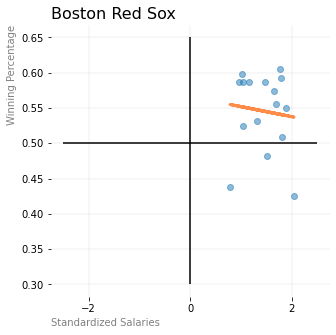

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))

# add in Line of Best fit for Red Sox
# use polyfit
z = np.polyfit(red_sox['StandardizedSalary'], red_sox['winning_perc'], 1)
p = np.poly1d(z)
# b- = blue solid line
# linewidth =3: adjust linewidth to get a thicker line
# c='#FF6F1C': adjust red color for Red Sox
plt.plot(red_sox['StandardizedSalary'], p(red_sox['StandardizedSalary']), 'b-',alpha=.8,c='#FF6F1C',linewidth =3)


ax.scatter(x=red_sox['StandardizedSalary'], y=red_sox['winning_perc'],alpha=0.5 )
plt.title('Boston Red Sox', position = (0,1), ha = 'left', fontsize=16)
plt.xlabel("Standardized Salaries", position = (0,0), ha = 'left', color = 'grey')
plt.ylabel('Winning Percentage', position = (0, 1), ha = 'right', color = 'grey')

# create cross hairs - centers plot also
plt.hlines(0.5,-2.5, 2.5)
plt.vlines(0,.3,.65)

# reduce ticks on x axis so it's cleaner
plt.xticks([-2,0,2])

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# add in gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)



In [29]:
def plot_team(team_df,team_color='#1f77b4'):
    ''' Generate a plot for the specified team
    team_df: a filtered dataframe that only contains data for the desired team
    team_color: color to use when generating plot.  defaults to blue (as for Blue Jays above)
    '''
    fig, ax = plt.subplots(figsize=(5, 5))

    # add in Line of Best fit for Team
    z = np.polyfit(team_df['StandardizedSalary'], team_df['winning_perc'], 1)
    p = np.poly1d(z)
    # b- = blue solid line
    # adjust linewidth to get a thicker line
    # adjust blue color to match python default blue for Blue Jays
    plt.plot(team_df['StandardizedSalary'], p(team_df['StandardizedSalary']), 'b-',alpha=.8,c=team_color,linewidth =3)


    ax.scatter(x=team_df['StandardizedSalary'], y=team_df['winning_perc'],alpha=0.5,c=team_color )
    plt.title(f"{team_df['teamID'].values[0]}",  loc = 'center', fontsize=16)
    plt.xlabel("Standardized Salaries", position = (0,0), ha = 'left', color = 'grey')
    plt.ylabel('Winning Percentage', position = (0, 1), ha = 'right', color = 'grey')
    # create cross hairs 
    plt.hlines(0.5,-2.5, 2.5)
    plt.vlines(0,.3,.65)

    # reduce ticks on x axis so it's cleaner
    plt.xticks([-2,0,2])

    #removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # add in gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

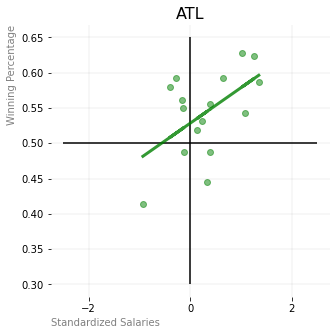

In [30]:
plot_team(df_merged[(df_merged['teamID']=='ATL')],'g')

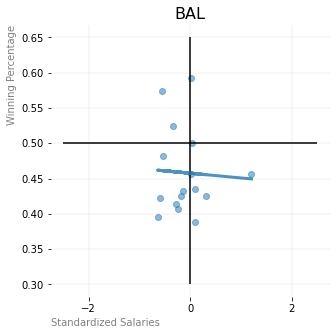

In [31]:
plot_team(df_merged[(df_merged['teamID']=='BAL')])

In [32]:
# function in a loop to generate plots for all the teams in the American League East
# create a dictionary with the team names and a colour to use for plotting that team

al_east_team_dict={
    'BAL':'#FF6F1C', 
    'BOS':'#FFB627',
    'NYA':'#223843', 
    'TOR':'#1f77b4', 
    'FLO':'#FFCAD4'
}
al_east_team_dict

{'BAL': '#FF6F1C',
 'BOS': '#FFB627',
 'NYA': '#223843',
 'TOR': '#1f77b4',
 'FLO': '#FFCAD4'}

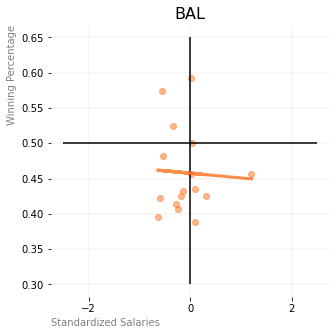

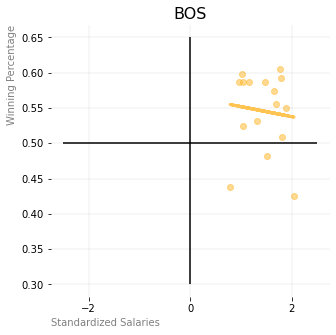

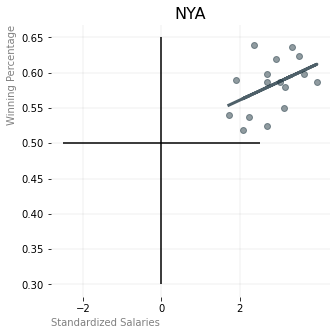

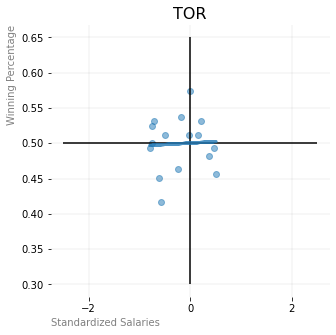

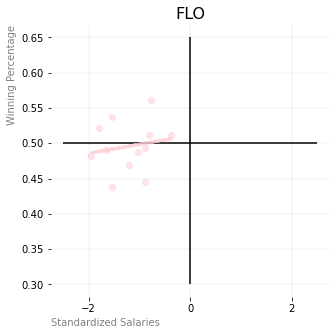

In [33]:
for team,color in al_east_team_dict.items():
    plot_team(df_merged[(df_merged['teamID']==team)],color)

In [34]:
def plot_team_row(team_df, ax,team_color='#1f77b4'):
    '''Creates a subplot for one team
    team_df: a filtered dataframe that only contains data for the desired team
    ax: the axes object to use for this plot.  Lets us target a specific subplot
    team_color: color to use when generating plot.  defaults to blue (as for Blue Jays above)
    '''

    # add in Line of Best fit for team
    z = np.polyfit(team_df['StandardizedSalary'], team_df['winning_perc'], 1)
    p = np.poly1d(z)
    # b- = blue solid line
    # adjust linewidth to get a thicker line
    # adjust blue color to match python default blue for team
    ax.plot(team_df['StandardizedSalary'], p(team_df['StandardizedSalary']), 'b-',alpha=.8,c=team_color,linewidth =3)
    

    ax.scatter(x=team_df['StandardizedSalary'], y=team_df['winning_perc'],alpha=0.5,c=team_color )
    # note change in how title is called
    ax.set_title(f"{team_df['teamID'].values[0]}")
 
    # suppress x/y labels so we can put one label on overall plot 
   # plt.xlabel("Standardized Salaries", position = (0,0), ha = 'left', color = 'grey') # getting error
   # plt.ylabel('Winning Percentage', position = (0, 1), ha = 'right', color = 'grey')

    # create cross hairs - note this also centered plot for us
    ax.hlines(0.5,-2.5, 2.5)
    ax.vlines(0,.3,.65)

    # reduce ticks on x axis so it's cleaner
    plt.xticks([-2,0,2])

    #removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # add in gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

[Text(0, 0.5, 'Winning Percentage'), Text(0.5, 0, 'Standardized Salaries')]

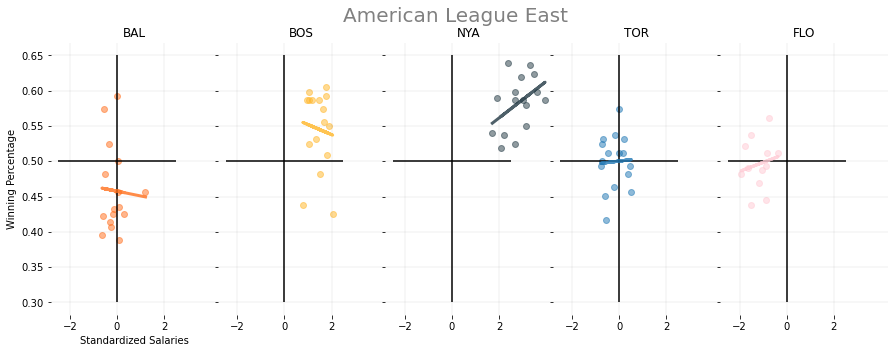

In [35]:
# create a plot that's 1 row and 5 columns wide
# sharex=True, sharey=True: these plots will share the same x and y axis
fig, ax = plt.subplots(nrows=1, ncols=5,figsize=(15,5),sharex=True, sharey=True)
# set an overall title for the plot
fig.suptitle('American League East', ha='center',color = 'grey',fontsize=20,va='top',) 
# help the subplots fit better
fig.subplots_adjust(hspace = .5, wspace=.001)

pos=0 # determines which axes object we will pass into the function to be filled by the team's plot
for team,color in al_east_team_dict.items():
    plot_team_row(df_merged[(df_merged['teamID']==team)], ax[pos],color)
    pos=pos+1

# force label to appear on first plot rather than the last plot
ax[0].set(xlabel='Standardized Salaries', ylabel='Winning Percentage')

In [36]:
# will need dictionaries for all leagues
al_central_team_dict={
    'CLE':'#FF6F1C', 
    'MIN':'#FFB627',
    'DET':'#223843', 
    'CHA':'#1f77b4', 
    'KCA':'#FFCAD4'
}
al_west_team_dict={
    'HOU':'#FF6F1C', 
    'OAK':'#FFB627',
    'SEA':'#223843', 
    'LAN':'#1f77b4', 
    'TEX':'#FFCAD4'
}

nl_central_team_dict={
    'ML4':'#FF6F1C', 
    'CHN':'#FFB627',
    'SLN':'#223843', 
    'PIT':'#1f77b4', 
    'CIN':'#FFCAD4'
}
nl_west_team_dict={
    'LAN':'#FF6F1C', 
    'COL':'#FFB627',
    'ARI':'#223843', 
    'SFN':'#1f77b4', 
    'SDN':'#FFCAD4'
}
nl_east_team_dict={
    'ATL':'#FF6F1C', 
    'WAS':'#FFB627',
    'PHI':'#223843', 
    'NYN':'#1f77b4', 
    'MIA':'#FFCAD4'
}

In [38]:
#Loop with a list
league_list = [al_east_team_dict, al_central_team_dict,al_west_team_dict, nl_east_team_dict, nl_central_team_dict, nl_west_team_dict]

TypeError: expected non-empty vector for x

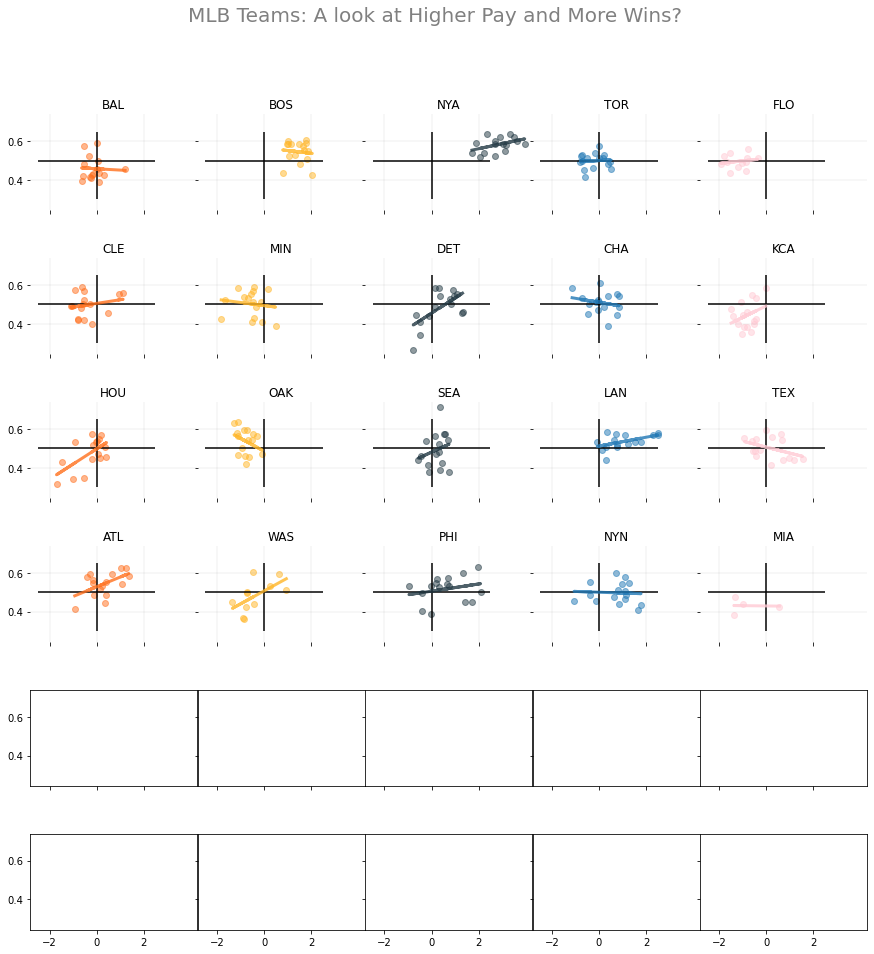

In [43]:
# create a plot that's 6 rows and 5 columns wide
fig, ax = plt.subplots(nrows=6, ncols=5,figsize=(15,15),sharex=True, sharey=True)

# set an overall title for the plot
fig.suptitle('MLB Teams: A look at Higher Pay and More Wins?', ha='center',color = 'grey',fontsize=20,va='top',) 

# help the subplots fit better
fig.subplots_adjust(hspace = .5, wspace=.001)

#ax[count[pos]:  the axes object contains a numpy array for each row with 5 sub plots (count indicates the row and pos indicates the column)
count = 0 # sets the row to be filled 
for league in league_list:
    pos=0 # sets the column to be filled by a given team in the division
    for team,color in league.items():
        plot_team_row(df_merged[(df_merged['teamID']==team)], ax[count][pos],color)
        pos=pos+1
    count += 1